**Profit Prediction Using Multiple Linear Regression**

**Business Understanding**

Startup adalah sebuah perusahaan yang baru didirikan dan masih dalam tahap pengembangan, dengan tujuan untuk menciptakan atau memperkenalkan produk atau layanan baru yang inovatif di pasar yang ada.

Karena merupakan perusahaan yang masih dalam tahap pengembangan dan keperluan untuk memproduksi sebuah produk atau jasa, maka diperlukan modal.

Startup mendapatkan modal atau pedanaan dari investor. Untuk itu melalui data yang ada, akan dibangun sebuah model yang dapat memprediksi profit atau laba dari perusahaan berdasarkan pengeluaran. 

**Strategi**

Variabel target atau respon merupakan data numerik, sehingga untuk memprediksi profit yang merupakan variabel respon akan digunakan supervised learning (multiple linear regression)



**Data Uderstanding**


***About the Dataset***

Project ini menggunakan data dari https://www.kaggle.com/datasets/pythonafroz/companies-profit

This data contains a few feature or variabel, such as 

1. R&D spend : The amount which company are spending on their Research and development.
2. Administration : The amount which company are spending on the Admin panel.
3. Marketing Spend : The amount which company are spending on marketing field.
4. State : The country where the company is located
6. Profit : Profit of the company 

**Data Preprocessing**

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
com = pd.read_csv("/content/drive/MyDrive/1000_Companies.csv")

Melihat tipe data pada dataset

In [ ]:
com.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        1000 non-null   float64
 1   Administration   1000 non-null   float64
 2   Marketing Spend  1000 non-null   float64
 3   State            1000 non-null   object 
 4   Profit           1000 non-null   float64
dtypes: float64(4), object(1)
memory usage: 39.2+ KB


**Missing value**

In [ ]:
com.isna().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

Dataset ini tidak mengandung missing value

**Statistika Deskriptif**

In [ ]:
com.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,81668.927200,122963.897612,226205.058419,119546.164656
std,46537.567891,12613.927535,91578.393542,42888.633848
min,0.000000,51283.140000,0.000000,14681.400000
25%,43084.500000,116640.684850,150969.584600,85943.198543
50%,79936.000000,122421.612150,224517.887350,117641.466300
75%,124565.500000,129139.118000,308189.808525,155577.107425
max,165349.200000,321652.140000,471784.100000,476485.430000


Berdasarkan hasil satistika deskriptif, dapat dilihat bahwa 


1.   Rata-rata pengeluaran untuk R&D adalah 81668.927200
2.   Rata-rata pengeluaran untuk administration adalah 122963.897612
3.   Rata-rata pengeluaran untuk marketing  adalah 226205.058419



**Unique values**

In [ ]:
for i in com.columns:
    print(i)
    print(com[i].unique())
    print()   

R&D Spend
[165349.2  162597.7  153441.51 144372.41 142107.34 131876.9  134615.46
 130298.13 120542.52 123334.88 101913.08 100671.96  93863.75  91992.39
 119943.24 114523.61  78013.11  94657.16  91749.16  86419.7   76253.86
  78389.47  73994.56  67532.53  77044.01  64664.71  75328.87  72107.6
  66051.52  65605.48  61994.48  61136.38  63408.86  55493.95  46426.07
  46014.02  28663.76  44069.95  20229.59  38558.51  28754.33  27892.92
  23640.93  15505.73  22177.74   1000.23   1315.46      0.      542.05
  87151.    38772.    89939.    65485.    47724.    30744.    76381.
 143923.    27280.   141092.   128338.    76660.    43088.    60955.
  12052.   126549.    22986.   150633.    53116.   157923.    39157.
 111768.    65903.    85800.   139796.    13947.   133094.   155148.
  28731.    41847.   140277.    27595.     9078.    21586.     4330.
 106761.   137618.    63161.    34384.    73431.    17125.   109497.
  78366.    98190.   125158.   138570.    46445.   134739.    96620.
 140797.   

R&D Spend and Marketing Spend memiliki data yang bernilai 0, ini cukup aneh dan dapat mempengaruhi model nantinya. sehingga nilai 0 pada data tersebut akan dihapus. 

In [ ]:
print(com[com['R&D Spend']==0].index.values)

[47 49]


In [ ]:
print(com[com['Marketing Spend']==0].index.values)

[19 47 48]


In [ ]:
com = com.drop([com.index[19],com.index[47],com.index[48], com.index[49]])

In [ ]:
print(com[com['R&D Spend']==0].index.values)

[]


In [ ]:
print(com[com['Marketing Spend']==0].index.values)

[]


**Outlier**

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
col = ['R&D Spend', 'Administration', 'Marketing Spend','Profit']

<Figure size 800x500 with 0 Axes>

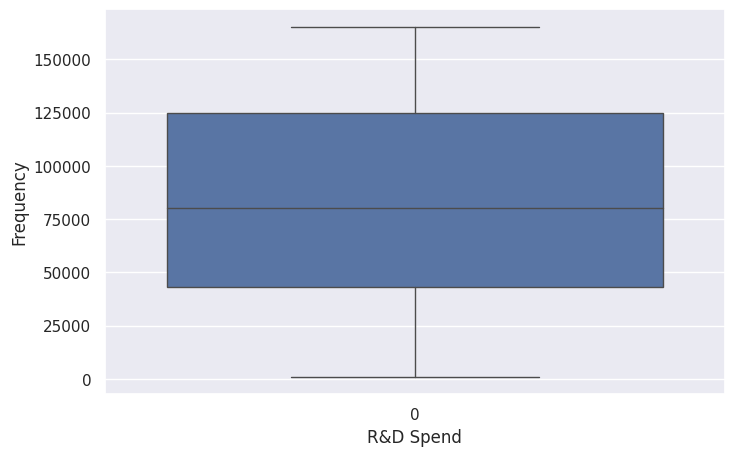

<Figure size 800x500 with 0 Axes>

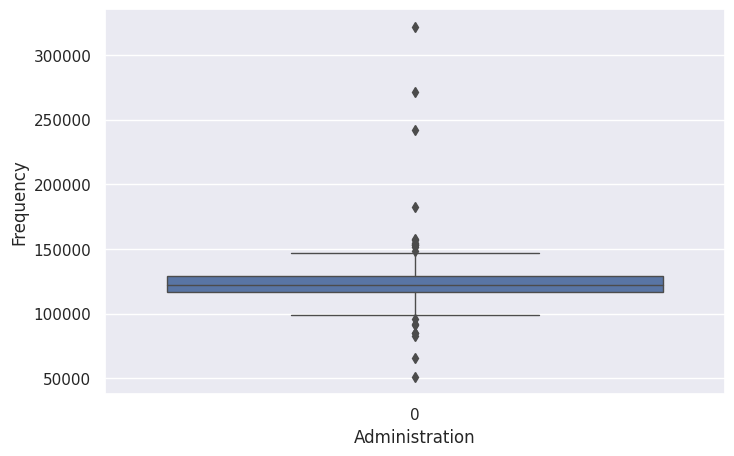

<Figure size 800x500 with 0 Axes>

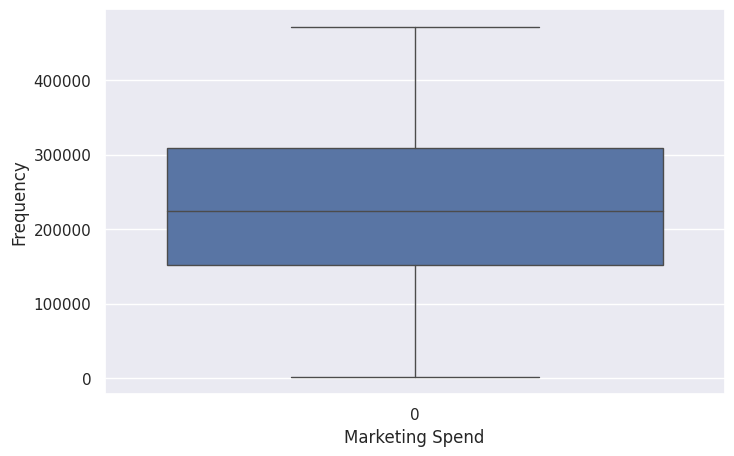

<Figure size 800x500 with 0 Axes>

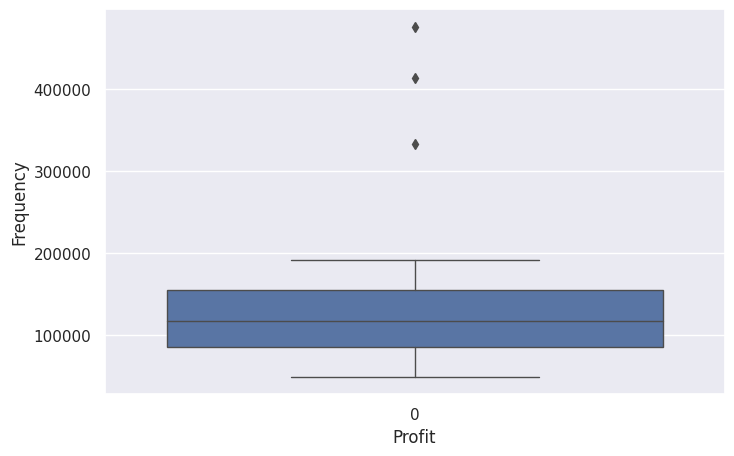

In [ ]:
for i in col:
    plt.figure()
    plt.tight_layout()
    sns.set(rc={"figure.figsize":(8, 5)})
    f, (ax_box) = plt.subplots(1, sharex=True)
    plt.gca().set(xlabel= i,ylabel='Frequency')
    sns.boxplot(com[i], ax=ax_box , linewidth= 1.0)

Berdasarkan visualisasi dengan boxplot variable profit dan administration mengandung outlier, metode untuk mengatasi outlier dalam kasus ini adalah dengan menghapus outlier.

**Handling Outlier**

In [ ]:
x = com[['R&D Spend', 'Administration', 'Marketing Spend','Profit']]

In [ ]:
def detect_outlier(x):
    Quantile1 = np.quantile(x, 0.25)
    Quantile3 = np.quantile(x, 0.75)
    IQR = Quantile3 - Quantile1
  
    return np.logical_or(x > Quantile3 + (IQR * 1.5), x < Quantile1 - (IQR * 1.5))

In [ ]:
def remove_outlier(data, columns=None):
    if columns is None:
        columns = data.columns
  
    for col in columns:
        dataframe = data[~detect_outlier(data[col])]
    
    return dataframe

In [ ]:
data = remove_outlier(com, columns=['R&D Spend', 'Administration', 'Marketing Spend','Profit'])

**Label encoder**

Variabel kategorik pada data ini akan diubah menjadi dummy variabel agar dapat diolah

In [ ]:
data_dum = pd.get_dummies(data['State'])
data_dum

,California,Florida,New York
0,0,0,1
1,1,0,0
2,0,1,0
3,0,0,1
4,0,1,0
...,...,...,...
992,0,1,0
993,1,0,0
994,0,0,1
995,1,0,0


In [ ]:
dataok = pd.concat([data,data_dum], axis = 1, join = "inner")
datas = dataok.drop(['State'], axis=1)
datas.head()

,R&D Spend,Administration,Marketing Spend,Profit,California,Florida,New York
0,165349.20,136897.80,471784.10,192261.83,0,0,1
1,162597.70,151377.59,443898.53,191792.06,1,0,0
2,153441.51,101145.55,407934.54,191050.39,0,1,0
3,144372.41,118671.85,383199.62,182901.99,0,0,1
4,142107.34,91391.77,366168.42,166187.94,0,1,0


**Exploratory Data Analysis**

Bar chart 

<Axes: xlabel='State', ylabel='Profit'>

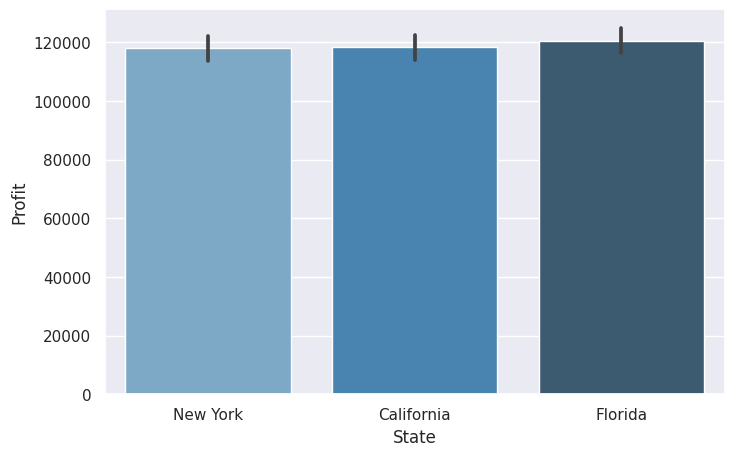

In [ ]:
sns.barplot(x='State',y='Profit',data=dataok, palette="Blues_d")

Berdasarkan visualisasi menggunakan barchart perusahaan yang berada di Florida merupakan penghasil profit terbesar

<Axes: xlabel='State', ylabel='R&D Spend'>

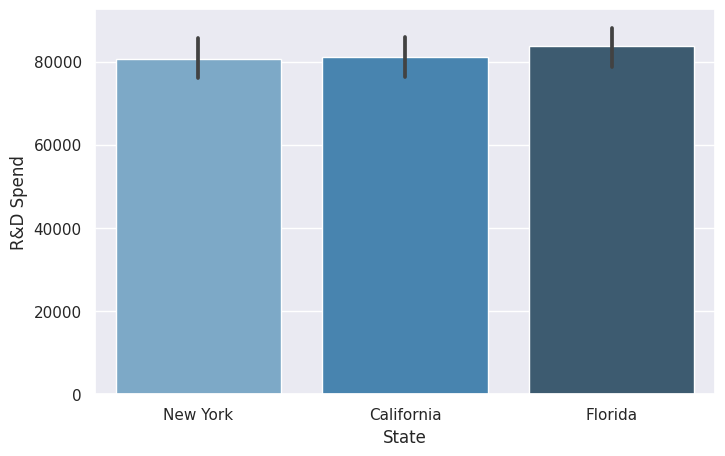

In [ ]:
sns.barplot(x='State',y='R&D Spend',data=dataok, palette="Blues_d")

Berdasarkan visualisasi menggunakan barchart perusahaan yang berada di Florida merupakan perusahaan dengan pengeluaran terbesar untuk R&D

<Axes: xlabel='State', ylabel='Administration'>

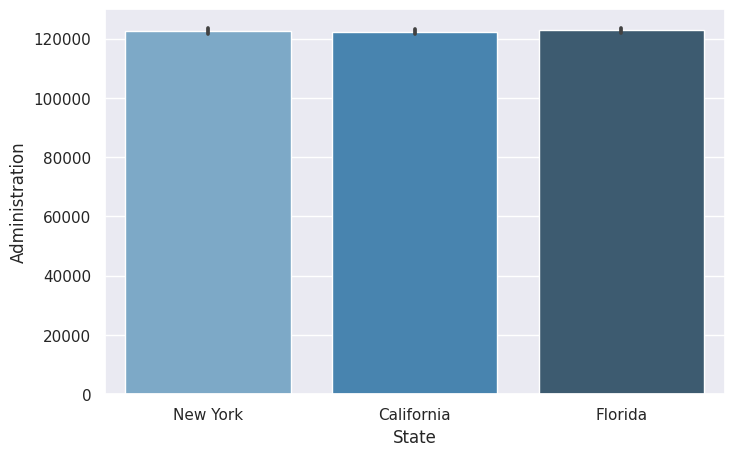

In [ ]:
sns.barplot(x='State',y='Administration',data=dataok, palette="Blues_d")

Semua perusahaan pada tiga negara memiliki pengeluaran yang sama untuk administrasi

<Axes: xlabel='State', ylabel='Marketing Spend'>

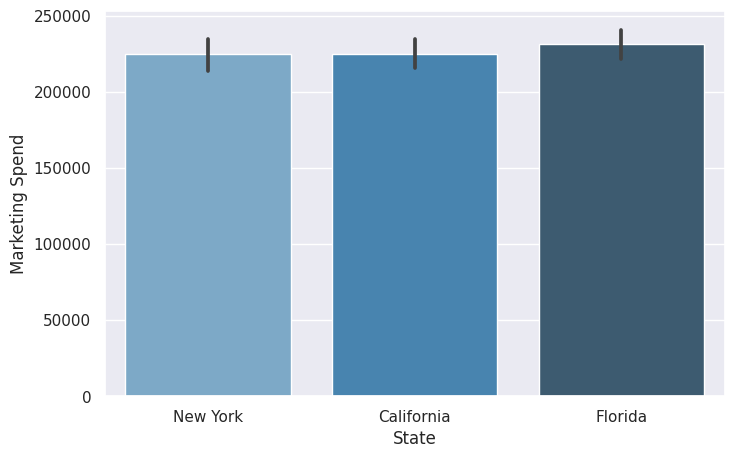

In [ ]:
sns.barplot(x='State',y='Marketing Spend',data=dataok, palette="Blues_d")

Berdasarkan visualisasi menggunakan barchart perusahaan yang berada di Florida merupakan perusahaan dengan pengeluaran terbesar untuk Marketing

<Axes: >

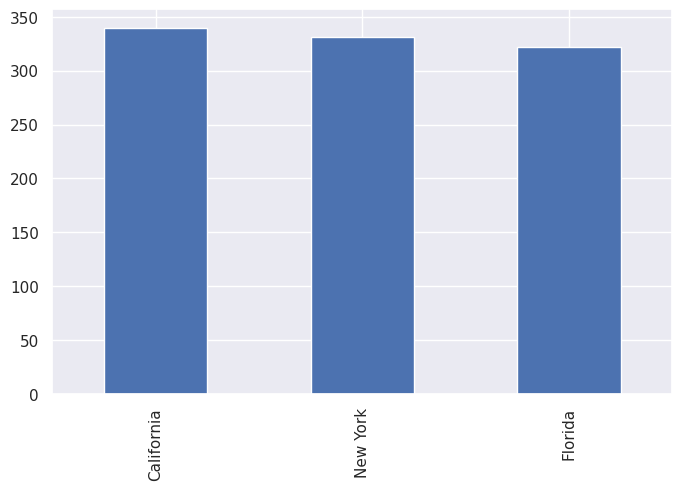

In [ ]:
dataok['State'].value_counts().plot(kind='bar')

Perusahaan terbanyak berada di california

**Analisis Deskriptif**

Berdasarkan visualisasi menggunakan barchart, kesimpulan sementara secara visualnya adalah marketing dan R&D berpengaruh terhadap profit hal tersebut dapat dibandingkan dengan bahwa banyaknya perusahaan tidak menjamin profitnya tinggi. sehingga yang sangat penting dilakukan adalah R&D dan marketing.

Histogram

<ipython-input-128-fb1f2d45a7e6>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(datas,bins=5,kde=True)
<ipython-input-128-fb1f2d45a7e6>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(datas,bins=5,kde=True)
<ipython-input-128-fb1f2d45a7e6>:7: UserWarning: 

`distplot` is a deprecated function

<Figure size 800x500 with 0 Axes>

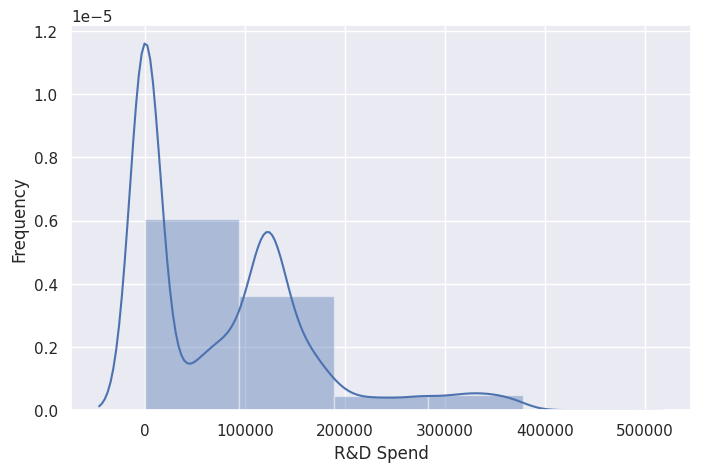

<Figure size 800x500 with 0 Axes>

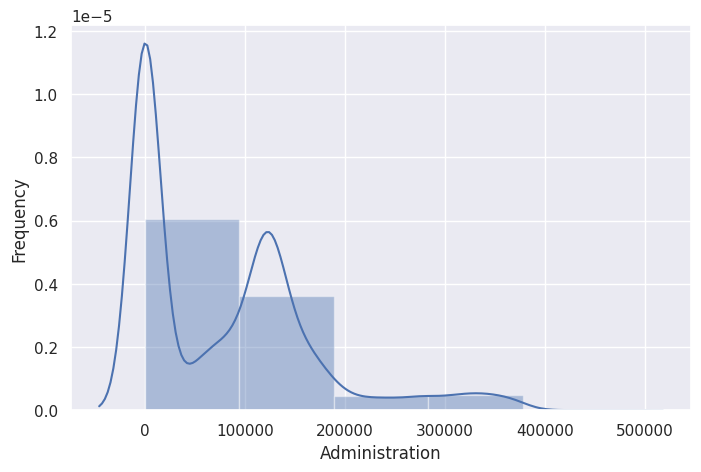

<Figure size 800x500 with 0 Axes>

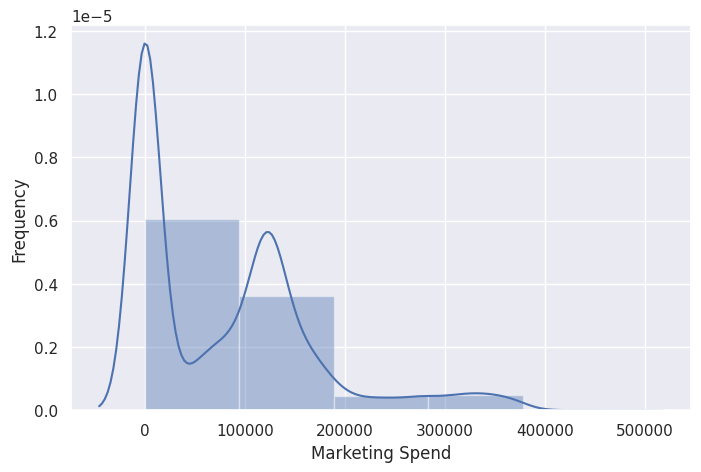

<Figure size 800x500 with 0 Axes>

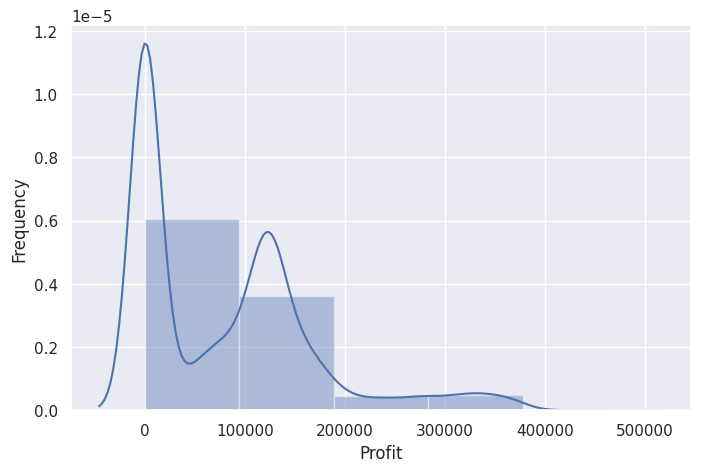

In [ ]:
for i in col:
    plt.figure()
    plt.tight_layout()
    sns.set(rc={"figure.figsize":(8, 5)})
    f, (ax_box) = plt.subplots(1, sharex=True)
    plt.gca().set(xlabel= i,ylabel='Frequency')
    sns.distplot(datas,bins=5,kde=True)

Semua variabel tidak berdistribusi normal

Boxplot

<Figure size 800x500 with 0 Axes>

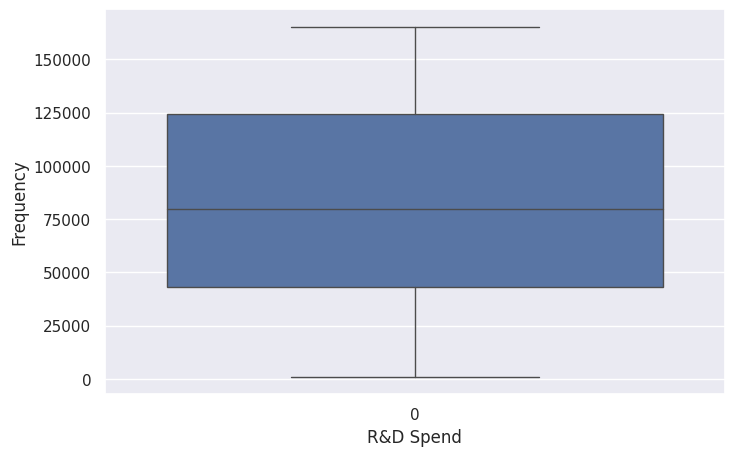

<Figure size 800x500 with 0 Axes>

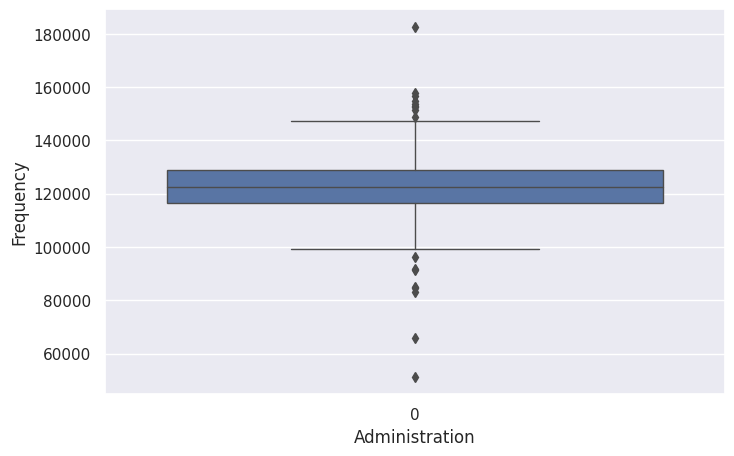

<Figure size 800x500 with 0 Axes>

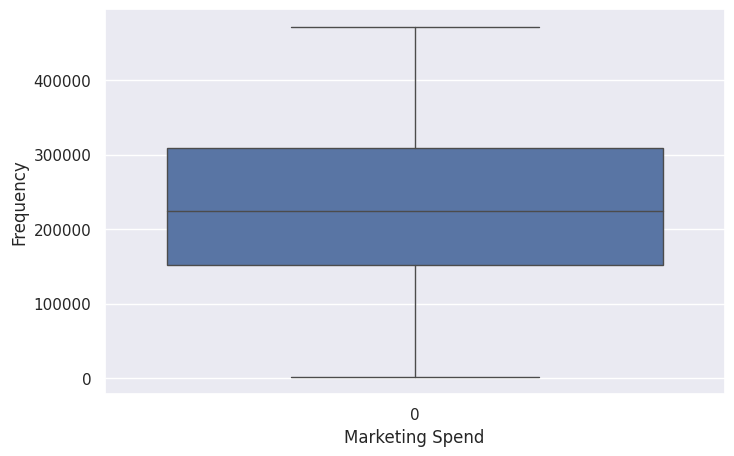

<Figure size 800x500 with 0 Axes>

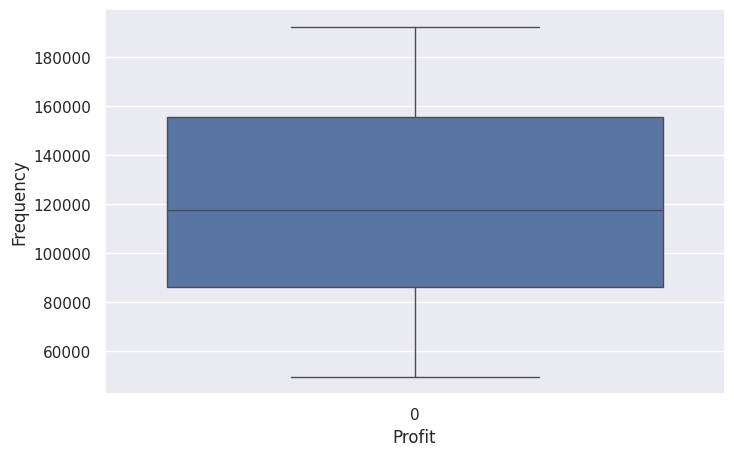

In [ ]:
for i in col:
    plt.figure()
    plt.tight_layout()
    sns.set(rc={"figure.figsize":(8, 5)})
    f, (ax_box) = plt.subplots(1, sharex=True)
    plt.gca().set(xlabel= i,ylabel='Frequency')
    sns.boxplot(datas[i], ax=ax_box , linewidth= 1.0)

Heatmap

<Axes: >

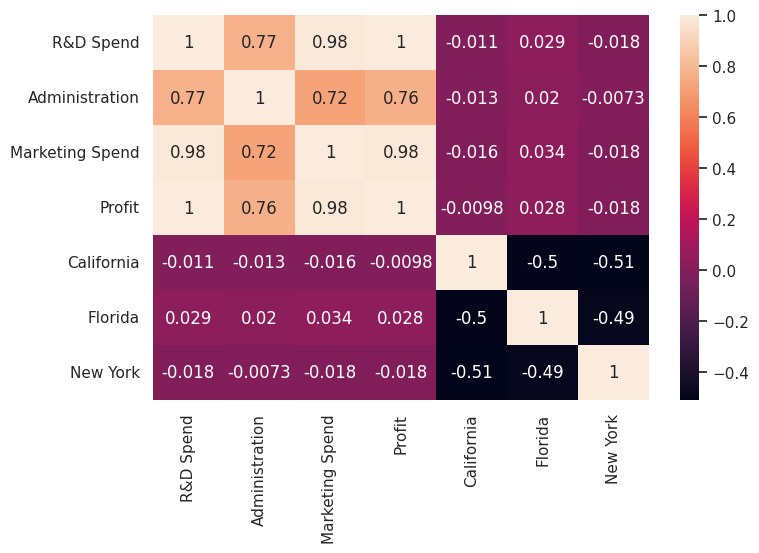

In [ ]:
sns.heatmap(datas.corr(), annot=True)

Berdasarkan visualisasi menggunakan heatmap variabel yang sangat berpengaruh sesuai dengan skor korelasi adalah R&D dan Marketing spend, sedangkan untuk administrasi memiliki skor kerelasi dibawah dua variabel preditor lain. 

Mengingat hasil analisis secara visual menggunakan barchart, analisis tersebut diperkuat oleh analisis korelasi menggunakan heatmap.

Scatter plot

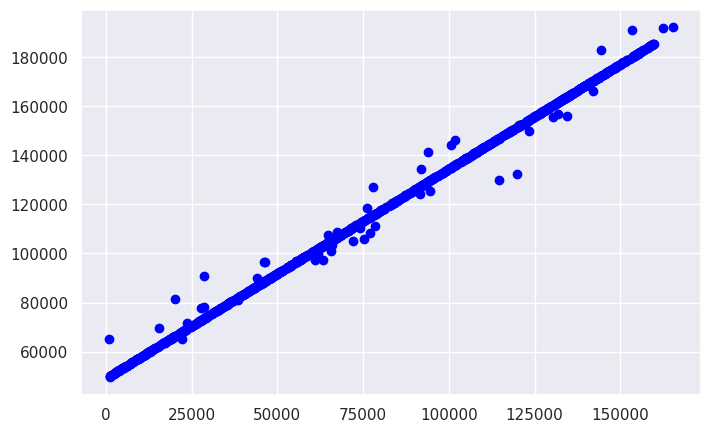

In [ ]:
x = datas['R&D Spend']
y = datas['Profit']
plt.scatter(x, y, c ="blue")
plt.show()

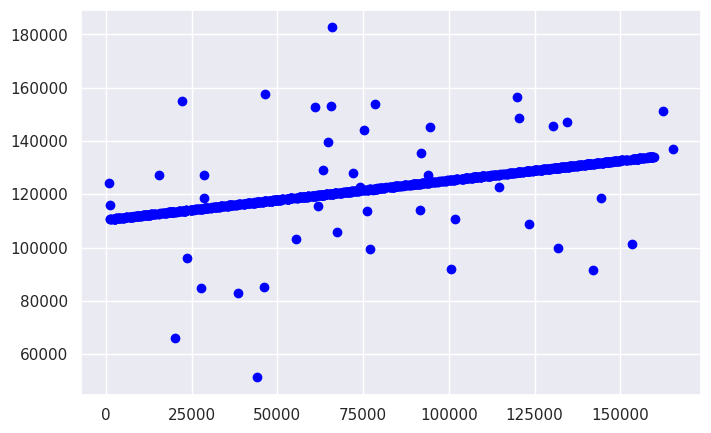

In [ ]:
x = datas['R&D Spend']
y = datas['Administration']
plt.scatter(x, y, c ="blue")
plt.show()

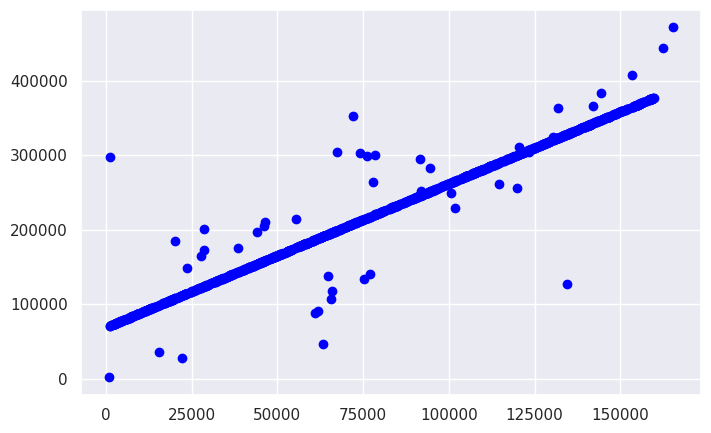

In [ ]:
x = datas['R&D Spend']
y = datas['Marketing Spend']
plt.scatter(x, y, c ="blue")
plt.show()

**Disribusi populasi**

In [ ]:
from scipy.stats import shapiro
# normality test
stat, p = shapiro(datas)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret results
alpha = 0.05
if p > alpha:
    print('Berdistribusi normal')
else:
    print('Tidak berdistribusi normal')

Statistics=0.819, p=0.000
Tidak berdistribusi normal


/usr/local/lib/python3.9/dist-packages/scipy/stats/_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


<ipython-input-135-a89b5f9afaf4>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(datas,bins=5,kde=True)


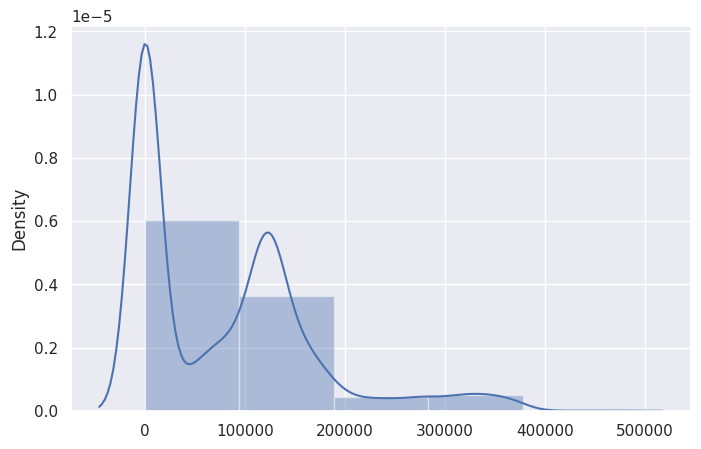

In [ ]:
sns.distplot(datas,bins=5,kde=True)
plt.show()

With Shapiro-wilk test, this dataset is non normal distribution. So, this dataset doesn't need to transform to norm distribution.

**Multiple Linear Regression**

Split dataset into training and testing, training for train the model and test for testing model.

Develop model with multiple linear regression

In [ ]:
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy import stats
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [ ]:
y = datas['Profit']
x = datas[['R&D Spend', 'Administration', 'Marketing Spend']]
x_1=sm.add_constant(x)

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_1,y,train_size=0.7,random_state=0) # performs the split

In [ ]:
model = LinearRegression()
model.fit(x_train,y_train)
print(model.intercept_, model.coef_)

46780.66572406341 [0.         0.80222686 0.00686299 0.02524627]


Model

46780.66572406332 + 0.80222686X1 +0.00686299X2+ 0.02524627X3

In [ ]:
model2= sm.OLS(y_train,x_train).fit()
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:                 Profit   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                 1.446e+05
Date:                Thu, 27 Apr 2023   Prob (F-statistic):               0.00
Time:                        03:10:13   Log-Likelihood:                -6101.3
No. Observations:                 695   AIC:                         1.221e+04
Df Residuals:                     691   BIC:                         1.223e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            4.678e+04   1463.243     

**Model Evaluation**

In [ ]:
prediction= model2.predict(x_test)
error = y_test - prediction
error.mean()

-20.12164076071996

In [ ]:
MAE = mean_absolute_error(prediction,y_test)
print(MAE)

405.8689303025497


In [ ]:
mse = mean_squared_error(prediction,y_test)
print(mse)

3044336.9896064065


In [ ]:
rmse = np.sqrt(mean_squared_error(prediction, y_test))
print(rmse*100)

174480.2851214545


In [ ]:
r2Score = r2_score(prediction, y_test)
print(r2Score*100)

99.80675960217712


In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [ ]:
k = KFold(n_splits=5, random_state=1, shuffle=True)

In [ ]:
score=cross_val_score(model,x_test,y_test,cv=k)
print("Cross Validation Scores are {}".format(score))
print("Average Cross Validation score :{}".format(score.mean()))

Cross Validation Scores are [0.99999872 0.99626239 0.99754362 0.99928654 0.99850879]
Average Cross Validation score :0.9983200123263222
